In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import PIL

In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/train'
test_path = 'Datasets/test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
for layer in resnet.layers:
    layer.trainable = False

In [7]:
folders = glob('Datasets/train/*')

In [8]:
x = Flatten()(resnet.output)

In [9]:
pred = Dense(len(folders), activation = 'softmax')(x)

In [10]:
model = Model(inputs = resnet.input, outputs = pred)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [16]:
model_train = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\USER\.conda\envs\carpred\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 19s 11s/step - loss: 5.1624 - accuracy: 0.3438 - val_loss: 5.4493 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 15s 11s/step - loss: 5.4511 - accuracy: 0.2500 - val_loss: 6.7546 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 12s 7s/step - loss: 5.7146 - accuracy: 0.3906 - val_loss: 4.9488 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 11s 8s/step - loss: 2.4077 - accuracy: 0.4062 - val_loss: 2.4350 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 11s 6s/step - loss: 2.7730 - accuracy: 0.4219 - val_loss: 3.0716 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 9s 7s/step - loss: 2.4069 - accuracy: 0.6094 - val_loss: 1.3066 - val_accuracy: 0.4655
Epoch 7/50
2/2 [==============================] - 9s 7s/step - loss: 1.2777 - accuracy: 0.5312 - val_loss: 2.6875 - val_accuracy: 0.3276
Epoch 8/50
2/2 [==================

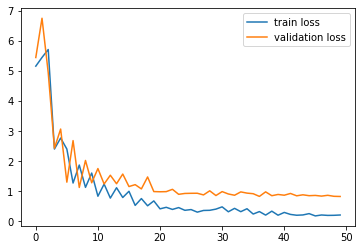

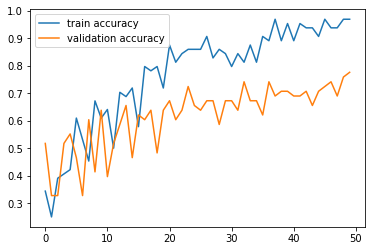

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(model_train.history['loss'], label='train loss')
plt.plot(model_train.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(model_train.history['accuracy'], label='train accuracy')
plt.plot(model_train.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
model.save('resnet50_car_brand_classification.h5')

C:\Users\USER\.conda\envs\carpred\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [19]:
y_pred = model.predict(test_set)

In [21]:
y_pred = np.argmax(y_pred, axis = 1)

In [22]:
y_pred

array([1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1], dtype=int64)

In [24]:
# Predict for new dataset
model = load_model('resnet50_car_brand_classification.h5')

In [60]:
img = load_img('Datasets\\Test\\mercedes\\43.jpg', target_size=(224,224))

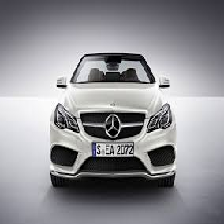

In [61]:
img

In [62]:
x = image.img_to_array(img)

In [63]:
x.shape

(224, 224, 3)

In [64]:
x = x/225

In [65]:
x

array([[[0.30222222, 0.29777777, 0.33333334],
        [0.30222222, 0.29777777, 0.33333334],
        [0.30222222, 0.29777777, 0.33333334],
        ...,
        [0.24444444, 0.24      , 0.27555555],
        [0.24444444, 0.24      , 0.27555555],
        [0.24444444, 0.24      , 0.27555555]],

       [[0.30666667, 0.30222222, 0.33777776],
        [0.30666667, 0.30222222, 0.33777776],
        [0.30666667, 0.30222222, 0.33777776],
        ...,
        [0.24444444, 0.24      , 0.27555555],
        [0.24444444, 0.24      , 0.27555555],
        [0.24444444, 0.24      , 0.27555555]],

       [[0.30666667, 0.30222222, 0.33777776],
        [0.30666667, 0.30222222, 0.33777776],
        [0.30666667, 0.30222222, 0.33777776],
        ...,
        [0.24444444, 0.24      , 0.27555555],
        [0.24444444, 0.24      , 0.27555555],
        [0.24444444, 0.24      , 0.27555555]],

       ...,

       [[0.52      , 0.52      , 0.5644444 ],
        [0.52      , 0.52      , 0.5644444 ],
        [0.5288889 , 0

In [66]:
x = np.expand_dims(x, axis = 0)
image_data = preprocess_input(x)
image_data.shape

(1, 224, 224, 3)

In [67]:
model.predict(image_data)

array([[4.7482271e-04, 4.0210365e-05, 9.9948490e-01]], dtype=float32)

In [68]:
y_test_pred = np.argmax(model.predict(image_data))

In [69]:
y_test_pred

2